# Lecture 8 - Maximum Likelihood and Maximum A Posteriori

In [1]:
import numpy as np
import scipy.stats as stats # scipy contains optimization, signal processing, and statistics modules

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

We can look at the **Regularized Least Squares** in the "Objective Function world", where we simply add a term to our objective in order to prevent overfitting and, consequently, allow the model to generalize to unseen and unkown data.

# Bayesian Interpretation

Another way to look at Regularized Least Squares is from a Bayesian point-of-view. To see this, let's look at our objective function:

\begin{align}
& \arg_{\mathbf{w}}\min \left(J(\mathbf{w})\right) \\
= & \arg_{\mathbf{w}}\max \left(- J(\mathbf{w})\right) \\
= & \arg_{\mathbf{w}}\max \left(\exp\left(- J(\mathbf{w})\right)\right) \text{, }\exp(\bullet)\text{ is a monotonic function}  
\end{align}

where

$$J(\mathbf{w})= \frac{1}{2}\sum_{n=1}^N \left(t_n - y_n\right)^2 + \frac{\lambda}{2} \sum_{i=0}^M w_i^2$$
and, consider e.g. the polynomial model (this could be *any* model)
$$y_n = \sum_{j=0}^M w_jx_n^j$$

Then,

\begin{align}
& \arg_{\mathbf{w}}\max \left(\exp\left(-\frac{1}{2}\sum_{n=1}^N \left(t_n - y_n\right)^2 - \frac{\lambda}{2} \sum_{i=0}^M w_i^2)\right)\right) \\
= & \arg_{\mathbf{w}}\max \left(\exp\left(-\frac{1}{2}\sum_{n=1}^N \left(t_n - y_n\right)^2\right) \exp\left(- \frac{\lambda}{2} \sum_{i=0}^M w_i^2)\right)\right) \\
=& \arg_{\mathbf{w}}\max \left(\prod_{n=1}^N \exp\left(-\frac{1}{2}\left(t_n - y_n\right)^2\right) \prod_{i=0}^M \exp \left(-\frac{\lambda}{2} w_i^2\right) \right)\text{, assuming the data }\{(x_n,t_n)\}_{n=1}^N\text{ is i.i.d.}  \\
\approx & \arg_{\mathbf{w}}\max \mathcal{N}\left(\mathbf{t}| \mathbf{y}, 1\right) \mathcal{N}\left(0, 1/\lambda\right) \\
=& \arg_{\mathbf{w}}\max p(\mathbf{t}|\mathbf{w}) p(\mathbf{w}), \mathbf{y}\text{ is a function of }\mathbf{w}\\
=& \arg_{\mathbf{w}}\max p(\mathbf{w}|\mathbf{t}) p(\mathbf{t}), \text{ using Bayes' Rule} \\
\propto & \arg_{\mathbf{w}}\max p(\mathbf{w}|\mathbf{t}), p(\mathbf{t})\text{ is constant for some fixed training set}  
\end{align}

where $p(\mathbf{t}|\mathbf{w})$ is known as the **data likelihood**, $p(\mathbf{w})$ is known as the **prior** on the parameters, and $p(\mathbf{w}|\mathbf{t})$ is the **posterior probability**.

In Machine Learning, this result is known as the **evidence approximation**.

* In practice, this means that we now can rewrite the Regularized Least Squares problem as the product between the *data likelihood* and a *prior distribution* on the parameters. 

    * In particular, for Least Squares cost function and an L2- regularization term, both distributions (likelihood's and prior's) follow a Gaussian distribution.
    
* Now, we can select **any** distribution function to our data and control the regularization also using a probabilistic model!

* **What is the shape of the prior distribution if we had considered the L1-norm or the Lasso regularizer?**

* **Using the same manipulation, what our optimization function look like *without* a regularization term?**

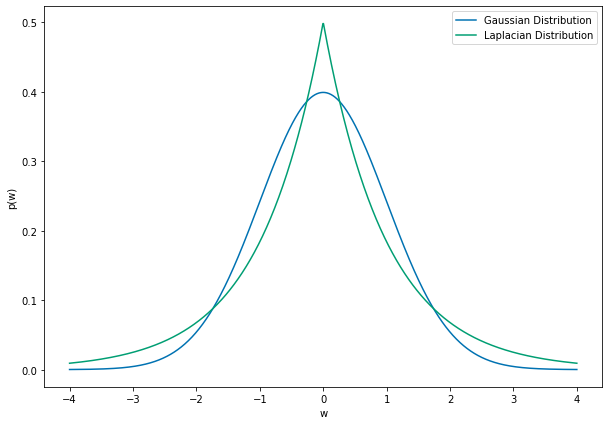

In [2]:
x = np.linspace(-4,4,1000)
Gaussian = np.exp(-x**2/2)/np.sqrt(2*np.pi) #Gaussian with zero-mean and unit-variance
Laplacian = np.exp(-np.abs(x))/(2) #Laplacian with zero-mean and lambda=1

plt.figure(figsize=(10,7))
plt.plot(x, Gaussian, label='Gaussian Distribution')
plt.plot(x, Laplacian, label='Laplacian Distribution')
plt.legend(loc='best')
plt.xlabel('w')
plt.ylabel("p(w)")
plt.show()

### Another note on Feature Selection

And, again, the L1-norm penalty (or *Lasso regularizer*) term *prefers* to have the weight parameters to be zero whereas the squared L2-norm penalty (or *ridge regularizer*) term *prefers* to have non-zero elements in $\mathbf{w}$.

The Lasso regularizer promotes sparsity, which can be used to perform feature selection.

## Maximum Likelihood Estimation (MLE) & Maximum A Posteriori (MAP)

Recall that our goal is to find the set of (hyper-)parameters that best fit our data. 

For the **Regularized Least Squares** objective function, we just showed that our optimization problem can be reduced to:

* Maximizing the **posterior** probability, that takes the shape of a Gaussian distribution, of unknown (hyper-)parameters, also known as **hypothesis** in the statistical inferencing.

For the **Least Squares without regularization** objective function, we just showed that our optimization problem can be reduced to:

* Maximizing the **data likelihood**, that takes the shape of a Gaussian distribution, with unknown (hyper-)parameters, also known as **hypothesis** in the statistical inferencing.

Recall the decision rules for statistical inferencing:

<div class="alert alert-info" role="alert">
  <strong>Maximum Likelihood (ML) Decision Rule</strong>

Given some observational data $\{x_i,t_i\}_{i=1}^N$, we can perform *classical* (or frequentist) statistical inferencing by computing the probability of 2 hypothesis, $H_0$ and $H_1$. The decision rule is given by:
    
$$P(\text{data}|H_0) \underset{H_1}{\overset{H_0}{\gtrless}} P(\text{data}|H_1)$$
    
</div>

<div class="alert alert-info" role="alert">
  <strong>Maximum A Posteriori (MAP) Decision Rule</strong>

Given some observational data $\{x_i,t_i\}_{i=1}^N$, we can perform Bayesian statistical inferencing by testing different hypothesis $\{H_i\}, i=1,2,3,4, \dots$, each with an induced **prior** probability $P(H_i)\neq 0, \forall i$. The decision rule is given by:

\begin{align}
P(H_i|\text{data}) &\underset{H_j}{\overset{H_i}{\gtrless}} P(H_j|\text{data}), i\neq j \\
\iff \frac{P(\text{data}|H_i)P(H_i)}{P(\text{data})} &\underset{H_j}{\overset{H_i}{\gtrless}} \frac{P(\text{data}|H_j)P(H_j)}{P(\text{data})}\\
\iff P(\text{data}|H_i)P(H_i) &\underset{H_j}{\overset{H_i}{\gtrless}} P(\text{data}|H_j)P(H_j), P(\text{data})\neq 0
\end{align}
    
</div>

In our problem, the hypothesis are the *unknown* **(hyper-)parameters** $\mathbf{w}$.

* In Bayesian statistical inferencing, we are then trying to find the $\mathbf{w}$'s that maximizing the posterior probability.
* In classical statistical inferencing, on the other hand, we are only computing the probability of some hypothesis (the *null hypothesis*).

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

In **Maximum Likelihood Estimation** (also referred to as **MLE** or **ML**) we want to *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{x}|\mathbf{w})$. We want to find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

In **Maximum A Posteriori** (also referred as **MAP**) we want to *find the set of parameters* that **maximize** the posteriori probability $P(\mathbf{w}|\mathbf{x})$. We want to find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of given some prior beliefs.

## Example

**Problem: Suppose I flip a coin 3 times and observe the event H-H-H. What is the probability of flipping Heads (H) on the next coin flip?**

Let $H_i$ be the event that it comes up heads on flip $i$. The sample space for this experiment is $S=\{H,T\}$. Consider the event $E=H_1\cap H_2\cap H_3$.

1. From Classical probability, what is the probability of heads in the next flip?

    * $P(H) = \frac{|H|}{|S|} = \frac{3}{3} = 1$

2. Bayesian Inference: What is the **hidden state** in this problem?

    * Hidden state: what type of coin was use in the experiment (fair, 2-headed)
    * So, by Law of Total Probability:
    $P(H) = P(H|\text{fair})P(\text{fair}) + P(\overline{H}|\text{2-headed})P(\text{2-headed})$
    * Furthermore, we can test different hypothesis by checking which hypothesis has the largest posterior probability value, e.g. if $P(\text{fair}|E) > P(\text{2-headed}|E)$, then hypothesis "fair" is more likely and that is what we will use to make predictions.
    
    
3. Note that the outcomes $H_i$ are **conditionally independent**, that is: $P(H_1\cap H_2|\text{fair}) = P(H_1|\text{fair})P(H_2|\text{fair})$. 
    * This is often an assumption that we make about data samples, we say that the samples are **independent and identically distributed (i.i.d.)**.
    
4. Recall that an experiment is **fair** if and only if (iff) the probability of each possible outcome (H,T) is equally likely to happen.

    * E.g., if $P(H)=P(T)=\frac{1}{2}$ then the experiment is fair.
    * But in this problem we do not know the probability of the outcomes are. In fact, that is exactly what we seek. Just like the polynomial regression problem, where we are finding the best hypothesis model but do not know which parameter values $\mathbf{w}$ to use.

Now, let's consider heads=1 and tails=0, so our sample space is $S=\{1,0\}$. The probability of heads is equal to some *unknown* value $\mu$, then:

\begin{align}
& P(x=1 | \mu) = \mu \\
& P(x=0|\mu) = 1-\mu
\end{align}

We can compute the data likelihood as:

$$P(x|\mu) = \mu^x(1-\mu)^{1-x} = \begin{cases}\mu & \text{if }x=1 \\ 1-\mu & \text{if } x=0 \end{cases}$$

* This is the **Bernoulli distribution**. The mean and variance of the Bernoulli distribution are: $E[x] = \mu$ and $E[\left(x- E[x]\right)^2] = \mu(1-\mu)$.

* So, for every outcome of the event $E$, we will model it using a Bernoulli distribution, and each outcome is pairwise **conditionally independent**. Therefore, we have the event $E$ contains i.i.d. outcomes.

### Method 1: Maximum Likelihood Estimator

For simplicity of calculation, assume that the event contains outcomes: $E=x_1\cap x_2\cap \dots\cap x_N$, where $x_i=\{0,1\}$ (0 for Tails and 1 for Heads). Then, for an experiment with $N$ samples, we can write the **data likelihood** as:


\begin{align}
P(E|\mu) &= P(x_1\cap x_2\cap \dots\cap x_N|\mu) \\
&= P(x_1|\mu)P(x_2|\mu)\dots P(x_N|\mu) \\
&= \prod_{n=1}^N P(x_n|\mu) \\
&= \prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}
\end{align}


* Now, we are interested in finding the value of $\mu$ given some data set $E$. 

We now optimize the data likelihood. What trick can we use?

$$arg_\mathbf{\mu} \max P(E|\mu) = \arg_\mathbf{\mu} \max \ln \left( P(E|\mu) \right)$$

because the $\ln(\bullet)$ is a monotonic function.

Where 
$$\ln(P(E|\mu) = \sum_{n=1}^N \left(x_n \ln(\mu) + (1-x_n)\ln(1-\mu)\right)$$

So now we can take the derivative of this function wrt to $\mu$ and equal it to zero:

$$\frac{\partial \ln(P(E|\mu))}{\partial \mu} = 0$$

\begin{align}
(1-\mu)\sum_{n=1}^N x_n - \mu \left(N - \sum_{n=1}^N x_n\right) &= 0 \\
\sum_{n=1}^N x_n - \mu\sum_{n=1}^N x_n - \mu N + \mu\sum_{n=1}^N x_n &= 0 \\
\sum_{n=1}^N x_n - \mu N &= 0 \\
\mu &= \frac{1}{N} \sum_{n=1}^N x_n
\end{align}

So the MLE estimation of the probability of seeing heads in the next coin flip is equal to **relative frequency** of outcome heads.

* Suppose you flipped the coin only once, and saw Tails. The probability of flipping Heads according to MLE would be 0.

* MLE is **purely data driven**! This is sufficient *when* we have lots and lots of data. 